<h1 style="text-align: center;">Desafío - Variables</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Variables.zip`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2108/sections/79631/activities/120916/items/617715">plataforma</a>.

## Habilidades a evaluar
- Hacer uso de métodos de `pandas` para segmentar columnas y filas.
- Hacer uso de los métodos `iterrows` e `iteritems` para implementar loops en `pandas`.
- Implementar `enumerate` en loops.
- Conocer las principales convenciones en la visualización de resultados en histogramas, gráficos de punto y barras.
- Generar simulaciones de la distribución normal.
- Conocer las principales aplicaciones de las distribuciones.
- Calcular e interpretar puntajes z.

## Descripción
- La empresa en la cual usted trabaja tiene como solicitud el análisis del Índice de Desarrollo Humano (IDH) de diversos países para elaborar un informe para el Ministerio de Relaciones Exteriores, a fin de poder contar con la data necesaria para poder comenzar a trabajar en relaciones diplomáticas más estrechas con diversos países. Para ello, usted queda a cargo de poder revisar la base de datos "Quality of Government", de la Universidad de Gotemburgo.

- Las unidades de medición en esta base corresponden a **194 países**, recolectando los últimos datos de enero del 2018. Además, se le recuerda que la base de datos es un compendio de alrededor de 1900 variables, que miden las causas y consecuencias de un buen gobierno en materias económicas, salud pública, medio ambiente, salud institucional, corrupción, entre otras.

## Requerimientos
A continuación, revisaremos los requerimientos y acciones que el Ministerio de RREE te pide realizar.

### 1. Genere una muestra de casos (1 punto). Para ello debes considerar:

- Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
- Seleccione el 50% de los casos.
- Cada base generada debe contener los siguientes elementos:
    - El índice de desarrollo humano (`undp_hdi`).
    - El nombre del país (`ccodealp`).
    - La región a la que pertenece (`ht_region`).
    - El PIB per cápita. (`gle_cgdpc`).
    - El total de la población (`imf_pop`).
    
- Si su **apellido está entre la A y la M**, escoja las siguientes variables del módulo **Educación**:
    - `ffp_hf`: Human Flight and Brain Drain.
    - `wef_qes`: Quality of the educational system.
    - `wdi_expedu`: Government expenditure on education, total (% of GDP).
    - `wdi_ners`: School enrollment, secondary (% net).

- Si su **apellido está entre la N y la Z**, escoja las siguientes variables del módulo **Salud**:
    - `wef_imort`: Infant mortality, deaths/1000 live births.
    - `who_alc2000`: Alcohol consumption per capita (2000-).
    - `who_tobt`: Current smoking of any tobacco product (Total).
    - `wdi_exph`: Government expenditure on health, total (% of GDP).

- Guarde esta tabla procesada en un nuevo objeto.
- Renombre las categorías de la variable `ht_region` de números a nombres de regiones, según la siguiente recodificación:

<table>
  <tr>
    <th>Código Región</th>
    <th>Nombre Región</th>
  </tr>
  <tr>
    <td>1</td>
    <td>EastEurope</td>
  </tr>
  <tr>
    <td>2</td>
    <td>LatAm</td>
  </tr>
  <tr>
    <td>3</td>
    <td>NorthAfrica</td>
  </tr>
  <tr>
    <td>4</td>
    <td>SubSaharian</td>
  </tr>
  <tr>
    <td>5</td>
    <td>WesternDem</td>
  </tr>
  <tr>
    <td>6</td>
    <td>EastAsia</td>
  </tr>
  <tr>
    <td>7</td>
    <td>SouthEastAsia</td>
  </tr>
  <tr>
    <td>8</td>
    <td>SouthAsia</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Pacific</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Caribbean</td>
  </tr>
</table>

In [1]:
# Se utiliza esta celda para importar los módulos necesarios e instanciar el DataFrame con los datos requeridos
import pandas as pd
import numpy as np 

df = pd.read_csv('qog_std_cs_jan18.csv')
df.head()
my_vars = ['ffp_hf','wef_qes','wdi_expedu','wdi_ners']

In [2]:
# Se utiliza esta celda para hacer la selección de datos solicitada y almacenar en nueva variable

df_sel = df.sample(frac=0.5, random_state=3515)[['undp_hdi','ccodealp','ht_region','gle_cgdpc','imf_pop'] + my_vars]
df_sel.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners
160,0.665,ZAF,4,8820.0596,54.146999,4.9,2.218669,6.02955,NaN
0,0.479,AFG,8,1282.6400,29.825001,8.1,NaN,3.78028,48.750320
63,0.450,GMB,4,1601.8800,NaN,7.7,4.276581,2.76771,NaN
188,0.794,URY,2,12804.8400,3.454000,4.4,2.903505,4.35694,76.348099
50,0.718,DOM,2,10376.6300,NaN,7.6,2.636395,NaN,65.457611


In [3]:
df_sel.shape

(97, 9)

In [7]:
# Se utiliza esta celda para realizar la recodificación de las regiones
#df['ht_region'].unique().sort() #para obtener la lista del 1 al 10
df_sel['ht_region'] = df_sel['ht_region'].replace([1,2,3,4,5,6,7,8,9,10],['EastEurope','LatAm','NorthAfrica','SubSaharian','WesternDem','EastAsia','SouthEastAsia','SouthAsia','Pacific','Caribbean'])

df_sel['ht_region'].value_counts()

SubSaharian      30
EastEurope       14
LatAm            11
WesternDem       11
Caribbean         7
NorthAfrica       6
SouthEastAsia     6
SouthAsia         5
Pacific           4
EastAsia          3
Name: ht_region, dtype: int64

### 2. Genere una función que ingrese su objeto y devuelva lo siguiente (2 puntos):
- Por cada variable existente en su objeto, calcule las medidas descriptivas para los casos continuos.
- Para cada variable discreta, que calcule la frecuencia.
- Reporte las estadísticas descriptivas para `gle_cgdpc`, `undp_hdi`, `imf_pop`.


In [8]:
# Se utiliza esta celda para definir la función
#  categoricas = data[columns].describe(include=[object]); numericas = data[columns].describe(include=[np.number])

def fetch_descriptives(data, columns):
    '''
        Función que calcula las estadísticas descriptivas de las variables categoricas y numericas.
    '''
    categoricas = None
    numericas = None

    try:
        categoricas = data[columns].describe(include=object)
    except Exception as e:
        print(e)
    
    try:
        numericas = data[columns].describe(include=[np.number])
    except Exception as e:
        print(e)

    return categoricas, numericas

In [9]:
# Se utiliza esta celda para realizar el llamado en las 3 variables solicitadas
cat, num = fetch_descriptives(df_sel,['gle_cgdpc','undp_hdi','imf_pop'])
num

No objects to concatenate


,gle_cgdpc,undp_hdi,imf_pop
count,95.000000,96.000000,68.000000
mean,13761.314415,0.689354,29.215368
std,17029.127584,0.156218,44.425037
min,324.160000,0.399000,0.018000
25%,2198.685050,0.562000,2.610500
50%,7370.720200,0.718000,7.873000
75%,17900.525500,0.798000,37.978498
max,104049.440000,0.948000,186.190002


**Compare las estadísticas con algún compañero. ¿Ve alguna diferencia sustancial en alguna de ellas?**

**Respuesta:** Se ven diferencias, sobre todo en gle_cgdpc. Sin embargo, en la visión global el comportamiento es similar considerando órdenes de magnitud.

### 3. Genere una función que liste las observaciones perdidas de una variable (2 puntos)
- La función debe contener los siguientes argumentos:
    - `dataframe`: La función debe ingresar un objeto DataFrame.
    - `var`: Variable a inspeccionar.
    - `print_list`: Opción para imprimir la lista de observaciones perdidas en la variable. Debe ser `False` por defecto.
    
- La función debe retornar la cantidad de casos perdidos y el porcentaje correspondiente.
- Cuando `print_list = True`, debe retornar la lista de casos.
- Analice todas las variables y sus casos perdidos.
- Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la lista de países con ausencia de datos.

In [10]:
# Se utiliza esta celda para definir la función solicitada
# dataframe[var].isna()

def show_null_cases(dataframe,var_to_inspect,column = 'ccodealp',print_list=False):
    null_cases = dataframe[var_to_inspect].isna()
    count_null = null_cases.sum()
    percent = (count_null/dataframe.shape[0]) * 100
    casos = []

    if print_list:
        casos = dataframe[null_cases][column]

    return count_null, percent, casos
    

In [11]:
# Se utiliza esta celda para realizar el llamado para todas las variables, con print_list=False. Puede usar un loop.
for c in df_sel.columns:
    null_qty, null_percent, _ = show_null_cases(df_sel,c) #Se usa _ para variables que no voy a usar.
    print(f'La columna {c} tiene {null_qty} casos perdidos y corresponde al {round(null_percent,2)}%')

La columna undp_hdi tiene 1 casos perdidos y corresponde al 1.03%
La columna ccodealp tiene 0 casos perdidos y corresponde al 0.0%
La columna ht_region tiene 0 casos perdidos y corresponde al 0.0%
La columna gle_cgdpc tiene 2 casos perdidos y corresponde al 2.06%
La columna imf_pop tiene 29 casos perdidos y corresponde al 29.9%
La columna ffp_hf tiene 6 casos perdidos y corresponde al 6.19%
La columna wef_qes tiene 20 casos perdidos y corresponde al 20.62%
La columna wdi_expedu tiene 23 casos perdidos y corresponde al 23.71%
La columna wdi_ners tiene 36 casos perdidos y corresponde al 37.11%


In [12]:
# Se utiliza esta celda para realizar el llamado para las 3 variables con más datos perdidos, mostrando la lista de países con ausencia de datos

for v in ['imf_pop','wdi_ners','wdi_expedu']:
    _,_,cases = show_null_cases(df_sel,v,'ccodealp',True)
    print(f'Países que tienen nulo, la variable {v} ')
    print(cases)

Países que tienen nulo, la variable imf_pop 
63     GMB
50     DOM
73     HND
19     BWA
49     DMA
164    SDN
52     SLV
139    GNB
169    SYR
145    KNA
176    TUN
97     LBR
102    MDG
190    VEN
55     ERI
118    NAM
29     CMR
76     IND
26     BDI
193    ZMB
72     HTI
159    SOM
40     COG
149    STP
41     COD
3      AND
163    SSD
69     GTM
61     GAB
Name: ccodealp, dtype: object
Países que tienen nulo, la variable wdi_ners 
160    ZAF
63     GMB
128    FSM
18     BIH
154    SLE
112    MNG
19     BWA
164    SDN
139    GNB
10     BHS
66     KIR
9      AUT
105    MDV
176    TUN
97     LBR
155    SGP
118    NAM
6      AZE
172    TGO
174    TTO
46     CZE
2      DZA
193    ZMB
72     HTI
159    SOM
180    UGA
40     COG
41     COD
3      AND
143    RUS
163    SSD
126    NGA
13     ARM
61     GAB
64     DEU
185    TZA
Name: ccodealp, dtype: object
Países que tienen nulo, la variable wdi_expedu 
50     DOM
18     BIH
189    UZB
19     BWA
183    EGY
49     DMA
164    SDN
169    SY

### 4. Grafique histogramas indicando medias muestral y total (2 puntos)
- Genere una nueva función que grafique un histograma de una variable entregada para un `DataFrame` de muestra. El gráfico debe además señalar las medias de la variable entregada, tanto para el `DataFrame` de muestra entregado, como para el `DataFrame` completo correspondiente.
- La función debe incluir los siguientes argumentos:
    - `sample_df`: La base de datos donde se encuentran los datos específicos (muestra).
    - `full_df`: La base de datos donde se encuentran todos los datos (contiene los datos de la muestra).
    - `var`: La variable a graficar.
    - `sample_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral (sample_df). Por defecto debe ser False.
    - `true_mean`: Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa (full_df).
- Realice el llamado a la función para las 4 variables seleccionadas según su grupo.

In [13]:
# Se utiliza esta celda para definir la función
import matplotlib.pyplot as plt

def plot_hist(sample_df,full_df,var,sample_mean:False,true_mean:False):
    plt.hist(sample_df[var])
    plt.title(var)

    if sample_mean:
        plt.axvline(sample_df[var].mean(), color='red',label='Promedio muestra')
    if true_mean:
        plt.axvline(full_df[var].mean(),color='blue',label='Promedio todos los datos')

    plt.legend()

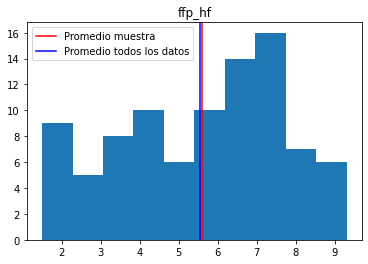

In [14]:
# Se utiliza esta celda para realizar el llamado para la primera variable
plot_hist(df_sel, df, my_vars[0],True,True)

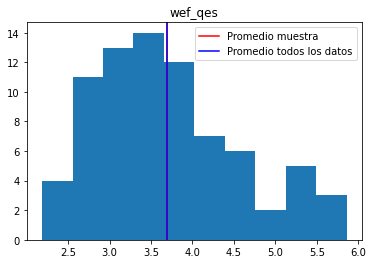

In [15]:
# Se utiliza esta celda para realizar el llamado para la segunda variable
plot_hist(df_sel, df, my_vars[1],True,True)

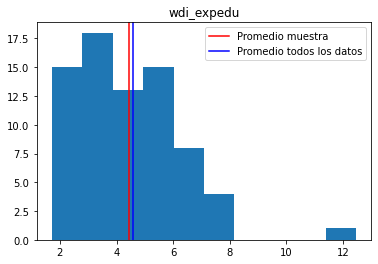

In [16]:
# Se utiliza esta celda para realizar el llamado para la tercera variable
plot_hist(df_sel, df, my_vars[2],True,True)

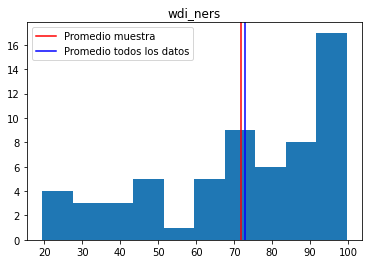

In [17]:
# Se utiliza esta celda para realizar el llamado para la cuarta variable
plot_hist(df_sel, df, my_vars[3],True,True)

**¿En qué variables la media de la muestra es mayor a la de los datos completos?**

**Respuesta:** 'ffp_hf'

### 5. Genere una función que devuelva un dotplot con las medias por región para una variable entregada (2 puntos)
- Cada "punto" del `dotplot` debe representar la media, o mediana, de una variable, para una región específica.
- La función debe contener los siguientes parámetros:
    - `dataframe`: La tabla de datos donde buscar las variables.
    - `plot_var`: Corresponde a una columna del dataframe entregado, de la cual se desea obtener la métrica (puede ser media o mediana).
    - `plot_by`: Corresponde a otra columna del dataframe entregado. Es la columna por la cual se quiere agrupar el dataframe, para acceder luego a la columna entregada en plot_var. _**Tip**_: Revise el uso del método `groupby` de `pandas`.
    - `statistic`: Debe presentar dos opciones; "mean" para la media y "median" para la mediana. Por defecto debe ser "mean".
    - `global_stat`: Booleano. Si es True, debe graficar la media (o mediana, según lo indicado en statistic) de la variable plot_var entregada, sin agrupar (para todos los datos entregados en dataframe). Por defecto debe ser `False`.

- Utilice la función en las 3 variables con una menor cantidad de datos perdidos.

In [18]:
# Se utiliza esta celda para definir la función

def dot_plot(dataframe, plot_var,plot_by, statistic = 'mean', global_stat = False):
    agrupacion = dataframe.groupby(plot_by)[plot_var]
    valores_grafico = []

    if statistic == 'mean':
        valores_grafico = agrupacion.mean()
    elif statistic == 'median':
        valores_grafico = agrupacion.median()

    plt.plot(valores_grafico,valores_grafico.index,"o")

    if global_stat and statistic == 'mean':
        plt.axvline(dataframe[plot_var].mean(), label='Promedio general')
    elif global_stat and statistic == 'median':
        plt.axvline(dataframe[plot_var].median(), label='Mediana general')

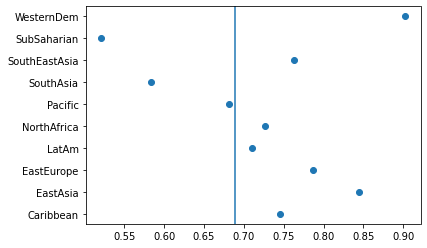

In [19]:
# Se utiliza esta celda para realizar el llamado para la primera variable
dot_plot(df_sel,'undp_hdi','ht_region',statistic='mean',global_stat=True)

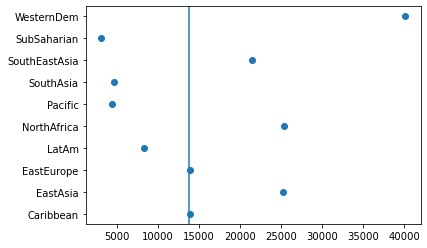

In [20]:
# Se utiliza esta celda para realizar el llamado para la segunda variable
dot_plot(df_sel,'gle_cgdpc','ht_region',statistic='mean',global_stat=True)

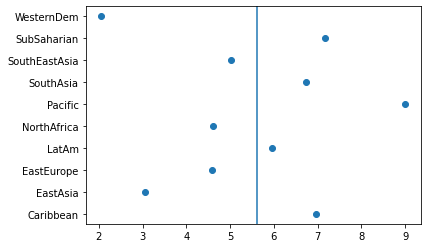

In [21]:
# Se utiliza esta celda para realizar el llamado para la tercera variable
dot_plot(df_sel,'ffp_hf','ht_region',statistic='mean',global_stat=True)

### 6. Guarde la base de datos (1 punto)
- La submuestra creada tiene un método llamado `to_csv()`. Acceda a éste y guarde la base de datos con la siguiente nomenclatura:
    - `subsample_<iniciales>_demo.csv`

- Subir el archivo generado a la plataforma, junto al desafío

In [81]:
# Se utiliza esta celda para realizar el guardado del dataframe
df_sel.to_csv('subsample_OA_demo.csv',index=False)

""" file = open('subsample_oa_demo.csv', 'w')
file.write(df_sel.to_csv())
file.close """

" file = open('subsample_oa_demo.csv', 'w')\nfile.write(df_sel.to_csv())\nfile.close "